In [27]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# helper functions
def calcDistance(latitude_1, longitude_1, latitude_2,  longitude_2):
  ans = pow(latitude_2 - latitude_1, 2) + pow(longitude_2 - longitude_1, 2)
  return ans**0.5

In [29]:
# settings
min_latitude = 0
max_latitude = 500
min_longitude = 0
max_longitude = 500

vertex_num = 15
edge_num = 50

In [30]:
city = 'ABC'
country = 'DEF'

title = "V" + str(vertex_num) + "E" + str(edge_num)

In [31]:
# init vertexes
name_base = "vertex-"
vertexes = []
vertexes_coordinate = []
for i in range(0, vertex_num):
  # init current vertex
  name = name_base + str(i)
  x = random.randint(min_latitude, max_latitude)
  y = random.randint(min_longitude, max_longitude)
  
  # Coordinates are the randome locations of the vertices
  coordinate = [x, y]
  # add vertex and its position
  vertexes.append(name)
  vertexes_coordinate.append(coordinate)

In [32]:
pos = {}
for i in range(vertex_num):
  pos[vertexes[i]] = vertexes_coordinate[i]

In [33]:
# init edges
weights = [ [-1] * vertex_num for i in range(vertex_num)]
edge_count = 0
while (edge_count < edge_num):
  # pick random start and destination
  v_1 = random.randint(0, vertex_num - 1)
  v_2 = random.randint(0, vertex_num - 1)
  
  # check if valid
  if v_1 == v_2 or weights[v_1][v_2] != -1:
    continue

  edge_count += 1
  weights[v_1][v_2] = calcDistance(vertexes_coordinate[v_1][0], vertexes_coordinate[v_1][1], vertexes_coordinate[v_2][0], vertexes_coordinate[v_2][1])

In [34]:
weights

[[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 70.43436661176133],
 [57.30619512757761,
  -1,
  187.275198571514,
  276.9855591903665,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  116.81181447096864,
  -1],
 [228.84929538890873,
  187.275198571514,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  190.85072700935672,
  322.50426353770894,
  313.28740798187215,
  93.34880824091971,
  278.30379084734005,
  188.7882411592417],
 [285.112258592997,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  296.23301639081353,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1],
 [-1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  189.73665961010275,
  221.28940327092033,
  169.24833824885843],
 [-1,
  -1,
  -1,
  -1,
  -1,
  -1,
  350.051424793558,
  -1,
  -1,
  -1,
  159.20113064925135,
  142.6218777046495,
  -1,
  -1,
  -1],
 [-1,
  52.630789467763066,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  -1,
  76.00657866263946,
  -1],
 [201.0994778710278,
  -1,
  -1,
  -1,

In [35]:
# transfer to edges
edges = []
for row in range(vertex_num):
  for col in range(vertex_num):
    if weights[row][col] == -1:
      continue
    curr_edge = []
    curr_edge.append(vertexes[row])
    curr_edge.append(vertexes[col])
    curr_edge.append(weights[row][col])
    edges.append(curr_edge)

Text(0.5, 1.0, 'V15E50')

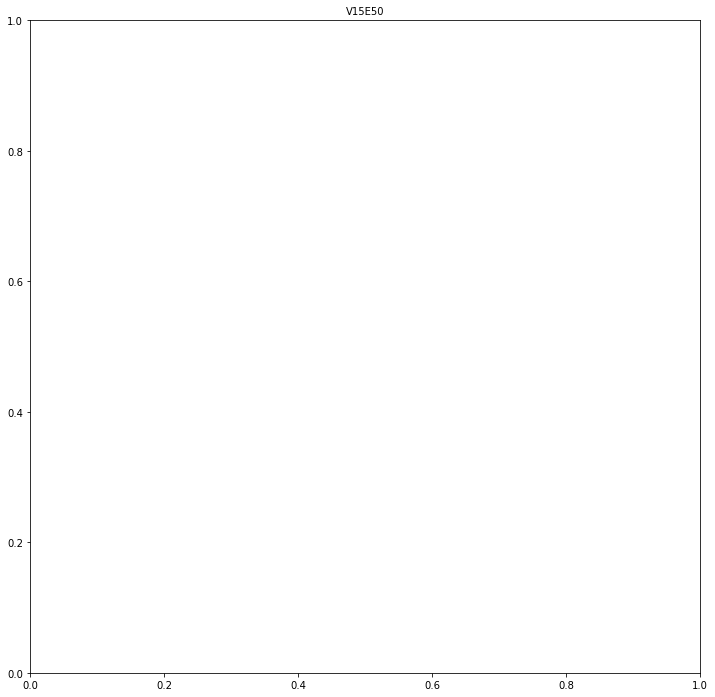

In [36]:
# init pyplot
fig = plt.figure(figsize=(12,12))
ax = plt.subplot(111)
ax.set_title(title, fontsize=10)

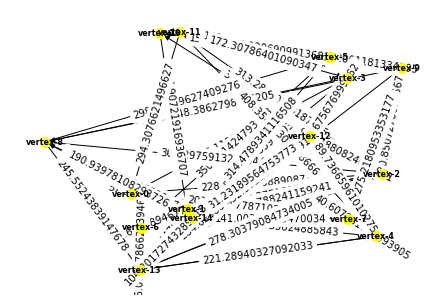

In [37]:
# init graph
G = nx.DiGraph()
G.add_nodes_from(vertexes)
G.add_weighted_edges_from(edges)

weight = nx.get_edge_attributes(G, 'weight')
nx.draw(G, pos = pos, with_labels = True, node_size = 100, node_color='yellow', font_size=8, font_weight='bold')

nx.draw_networkx_edge_labels(G, pos, edge_labels = weight)
# plt.tight_layout()
plt.savefig("test_data/" +title + ".png", format = "png")
plt.show()

In [38]:
# calc shortest path using libary
shortest_path = []
# Ierate through all possible pairs of source and destination
for source in range(vertex_num):
  for destination in range(vertex_num):
    if source == destination:
      continue
    path = nx.dijkstra_path(G, vertexes[source], vertexes[destination])
    shortest_path.append(path)

# init for saving
vertex_save = []
for i in range(vertex_num):
  curr_data = []
  # airport_id
  curr_data.append(i)
  curr_data.append(vertexes[i])
  curr_data.append(city)
  curr_data.append(country)
  curr_data.append(vertexes_coordinate[i][0])
  curr_data.append(vertexes_coordinate[i][1])
  vertex_save.append(curr_data)

edge_save = []
airline_id = 1
for row in range(vertex_num):
  for col in range(vertex_num):
    # if edge not exist
    if weights[row][col] == -1:
      continue
    curr_data = []
    curr_data.append(airline_id)
    airline_id += 1
    curr_data.append(row)
    curr_data.append(col)
    # stops
    curr_data.append(0)
    edge_save.append(curr_data)


In [39]:
import csv

with open("test_data/" + title + "_shortest_path.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(shortest_path)

with open("test_data/" + title + "_vertex.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(vertex_save)

with open("test_data/" + title + "_edge.csv", "w", newline="") as f:
    writer = csv.writer(f)
    #edge_save: id, row, col, stop
    writer.writerows(edge_save)